# 0. IMPORT

In [3]:
import pandas as pd
import numpy as np
import math
import datetime
import json
import requests
import re
import itertools
import re
import ast
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
import collections as co

import time
from datetime import timedelta
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
%matplotlib inline


#for visualisation
%pylab inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
sns.set(style="white", color_codes=True)

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



Populating the interactive namespace from numpy and matplotlib


In [5]:

import lightgbm as lgb


In [6]:
payments_df = pd.read_csv('./data/payments_2018.csv' , sep = ';' , error_bad_lines = False)
payments_df.columns = ['sku' , 'id_payment' , 'date' , 'time' , 'price' , 'discount' , 'id_place' , 'id_good']
payments_df.drop(axis = 1,columns = ['id_payment'] , inplace = True)
payments_df['date'] = pd.to_datetime(payments_df['date'], format="%d.%m.%Y")

goods_df = pd.read_csv('./data/goods.csv' , sep = ';')

b'Skipping line 2971: expected 8 fields, saw 9\nSkipping line 4689: expected 8 fields, saw 9\nSkipping line 5063: expected 8 fields, saw 9\nSkipping line 5072: expected 8 fields, saw 9\nSkipping line 5075: expected 8 fields, saw 9\nSkipping line 5102: expected 8 fields, saw 9\nSkipping line 5111: expected 8 fields, saw 9\nSkipping line 5116: expected 8 fields, saw 9\nSkipping line 5145: expected 8 fields, saw 9\nSkipping line 5161: expected 8 fields, saw 9\nSkipping line 5190: expected 8 fields, saw 9\nSkipping line 5219: expected 8 fields, saw 9\nSkipping line 5249: expected 8 fields, saw 9\nSkipping line 5261: expected 8 fields, saw 9\nSkipping line 5280: expected 8 fields, saw 9\nSkipping line 5297: expected 8 fields, saw 9\nSkipping line 5318: expected 8 fields, saw 9\nSkipping line 5328: expected 8 fields, saw 9\nSkipping line 5334: expected 8 fields, saw 9\nSkipping line 5389: expected 8 fields, saw 9\nSkipping line 5401: expected 8 fields, saw 9\nSkipping line 5418: expected 8 f

b'Skipping line 132383: expected 8 fields, saw 9\nSkipping line 132394: expected 8 fields, saw 9\nSkipping line 132433: expected 8 fields, saw 9\nSkipping line 132461: expected 8 fields, saw 9\nSkipping line 132465: expected 8 fields, saw 9\nSkipping line 132472: expected 8 fields, saw 9\nSkipping line 132494: expected 8 fields, saw 9\nSkipping line 132517: expected 8 fields, saw 9\nSkipping line 132527: expected 8 fields, saw 9\nSkipping line 132550: expected 8 fields, saw 9\nSkipping line 132580: expected 8 fields, saw 9\nSkipping line 132622: expected 8 fields, saw 9\nSkipping line 132658: expected 8 fields, saw 9\nSkipping line 132670: expected 8 fields, saw 9\nSkipping line 132707: expected 8 fields, saw 9\nSkipping line 132713: expected 8 fields, saw 9\nSkipping line 132739: expected 8 fields, saw 9\nSkipping line 132742: expected 8 fields, saw 9\nSkipping line 132775: expected 8 fields, saw 9\nSkipping line 132776: expected 8 fields, saw 9\nSkipping line 132779: expected 8 field

b'Skipping line 280841: expected 8 fields, saw 9\nSkipping line 280983: expected 8 fields, saw 9\nSkipping line 281121: expected 8 fields, saw 9\nSkipping line 281142: expected 8 fields, saw 9\nSkipping line 281185: expected 8 fields, saw 9\nSkipping line 281211: expected 8 fields, saw 9\nSkipping line 281247: expected 8 fields, saw 9\nSkipping line 281265: expected 8 fields, saw 9\nSkipping line 281287: expected 8 fields, saw 9\nSkipping line 281292: expected 8 fields, saw 9\nSkipping line 281392: expected 8 fields, saw 9\nSkipping line 281491: expected 8 fields, saw 9\nSkipping line 281526: expected 8 fields, saw 9\nSkipping line 281546: expected 8 fields, saw 9\nSkipping line 281568: expected 8 fields, saw 9\nSkipping line 281656: expected 8 fields, saw 9\nSkipping line 281657: expected 8 fields, saw 9\nSkipping line 281740: expected 8 fields, saw 9\nSkipping line 281788: expected 8 fields, saw 9\nSkipping line 281841: expected 8 fields, saw 9\nSkipping line 281844: expected 8 field

b'Skipping line 407858: expected 8 fields, saw 9\nSkipping line 407860: expected 8 fields, saw 9\nSkipping line 407907: expected 8 fields, saw 9\nSkipping line 407924: expected 8 fields, saw 9\nSkipping line 407931: expected 8 fields, saw 9\nSkipping line 407948: expected 8 fields, saw 9\nSkipping line 407964: expected 8 fields, saw 9\nSkipping line 407975: expected 8 fields, saw 9\nSkipping line 408021: expected 8 fields, saw 9\nSkipping line 408027: expected 8 fields, saw 9\nSkipping line 408035: expected 8 fields, saw 9\nSkipping line 408064: expected 8 fields, saw 9\nSkipping line 408078: expected 8 fields, saw 9\nSkipping line 408135: expected 8 fields, saw 9\nSkipping line 408139: expected 8 fields, saw 9\nSkipping line 408156: expected 8 fields, saw 9\nSkipping line 408205: expected 8 fields, saw 9\nSkipping line 408229: expected 8 fields, saw 9\nSkipping line 408254: expected 8 fields, saw 9\nSkipping line 408286: expected 8 fields, saw 9\nSkipping line 408307: expected 8 field

b'Skipping line 470392: expected 8 fields, saw 9\nSkipping line 471133: expected 8 fields, saw 9\nSkipping line 471134: expected 8 fields, saw 9\nSkipping line 471144: expected 8 fields, saw 9\nSkipping line 471213: expected 8 fields, saw 9\nSkipping line 471232: expected 8 fields, saw 9\nSkipping line 471239: expected 8 fields, saw 9\nSkipping line 471273: expected 8 fields, saw 9\nSkipping line 471285: expected 8 fields, saw 9\nSkipping line 471299: expected 8 fields, saw 9\nSkipping line 471316: expected 8 fields, saw 9\nSkipping line 471322: expected 8 fields, saw 9\nSkipping line 471344: expected 8 fields, saw 9\nSkipping line 471352: expected 8 fields, saw 9\nSkipping line 471403: expected 8 fields, saw 9\nSkipping line 471415: expected 8 fields, saw 9\nSkipping line 471417: expected 8 fields, saw 9\nSkipping line 471429: expected 8 fields, saw 9\nSkipping line 471457: expected 8 fields, saw 9\nSkipping line 471475: expected 8 fields, saw 9\nSkipping line 471506: expected 8 field

b'Skipping line 597034: expected 8 fields, saw 9\nSkipping line 598180: expected 8 fields, saw 9\nSkipping line 598236: expected 8 fields, saw 9\nSkipping line 598247: expected 8 fields, saw 9\nSkipping line 598260: expected 8 fields, saw 9\nSkipping line 598294: expected 8 fields, saw 9\nSkipping line 598313: expected 8 fields, saw 9\nSkipping line 598331: expected 8 fields, saw 9\nSkipping line 598366: expected 8 fields, saw 9\nSkipping line 598400: expected 8 fields, saw 9\nSkipping line 598419: expected 8 fields, saw 9\nSkipping line 598437: expected 8 fields, saw 9\nSkipping line 598471: expected 8 fields, saw 9\nSkipping line 598479: expected 8 fields, saw 9\nSkipping line 598518: expected 8 fields, saw 9\nSkipping line 598534: expected 8 fields, saw 9\nSkipping line 598552: expected 8 fields, saw 9\nSkipping line 598560: expected 8 fields, saw 9\nSkipping line 598584: expected 8 fields, saw 9\nSkipping line 598604: expected 8 fields, saw 9\nSkipping line 598610: expected 8 field

In [7]:
#ins
print(payments_df)

              sku       date   time  price  discount  id_place  id_good
0         1000438 2018-08-31  10:34   7000         0        43      346
1         1000426 2018-08-31  10:34  18000         0        99      432
2         1000536 2018-08-31  10:41  10000         0        41      407
3          ID:469 2018-08-31  10:42  13500         0        59      469
4         1000441 2018-08-31  10:47   8000         0        32      348
5          ID:363 2018-08-31  10:47  14900         0        32      363
6          ID:468 2018-08-31  10:48  13500         0        89      468
7          ID:487 2018-08-31  10:50  16000         0        61      487
8          ID:585 2018-10-03  23:24  16800      4200       110      585
9         1001289 2018-10-03  23:24   5600      1400       110      378
10         ID:469 2018-10-04  06:40  13500         0        64      469
11         ID:487 2018-10-04  07:51  16000         0       108      487
12        1000439 2018-10-04  08:07  11500         0        84  

In [8]:
#ins 
print(goods_df)

           sku                                             name  price  \
0    1000777.1                     Блины с картофелем и грибами   7500   
1      1000438                          Блины с куриной печенью   7000   
2    1000779.1                        Блины с курицей и грибами  12000   
3      1000439                  Блины с семгой и фета с зеленью  11500   
4      1000441                        Блины с творогом и изюмом   8000   
5      1000440                       Блины с яблоками и корицей   7000   
6      1000700                          Запеканка со смородиной  12000   
7      1000775                                    Киш с овощами   9900   
8    1000776.1                          Киш с сёмгой и брокколи  15000   
9      1000848                                 Кляфути с вишней  10900   
10     1000849                               Кляфути с персиком  10900   
11     1000369                                    Кукис полевой   5500   
12     1001419                        

In [9]:
model_df  = pd.merge(payments_df, goods_df[['sku','category_id']], on='sku')


pay_aggr_df = None
pay_aggr_df = model_df.drop(['sku' , 'time' ,'price' ] , axis = 1)[:]

pay_aggr_df = pay_aggr_df.groupby(['date' , 'id_place','id_good' , 'category_id'])[['discount']].count().reset_index()[:]
pay_aggr_df.columns = ['date' , 'id_place','id_good' ,'category_id','count']


In [10]:
#ins
print(pay_aggr_df)

             date  id_place  id_good  category_id  count
0      2018-04-19        32      346         11.0      2
1      2018-04-19        32      347         11.0      2
2      2018-04-19        32      349         11.0      2
3      2018-04-19        32      358          3.0      1
4      2018-04-19        32      359          3.0      1
5      2018-04-19        32      364          3.0      4
6      2018-04-19        32      374          2.0      1
7      2018-04-19        32      376          2.0      2
8      2018-04-19        32      377          2.0      1
9      2018-04-19        32      379          2.0      2
10     2018-04-19        32      385         10.0      2
11     2018-04-19        32      389          4.0      2
12     2018-04-19        32      392          4.0      2
13     2018-04-19        32      394          4.0      2
14     2018-04-19        32      399          4.0      1
15     2018-04-19        32      405          6.0      1
16     2018-04-19        32    

In [11]:
pay_aggr_df['count'] = np.log2(pay_aggr_df['count'] + 1)

pay_aggr_df['weekday'] = pay_aggr_df['date'].dt.weekday

In [12]:
#ins
print(pay_aggr_df)

             date  id_place  id_good  category_id     count  weekday
0      2018-04-19        32      346         11.0  1.584963        3
1      2018-04-19        32      347         11.0  1.584963        3
2      2018-04-19        32      349         11.0  1.584963        3
3      2018-04-19        32      358          3.0  1.000000        3
4      2018-04-19        32      359          3.0  1.000000        3
5      2018-04-19        32      364          3.0  2.321928        3
6      2018-04-19        32      374          2.0  1.000000        3
7      2018-04-19        32      376          2.0  1.584963        3
8      2018-04-19        32      377          2.0  1.000000        3
9      2018-04-19        32      379          2.0  1.584963        3
10     2018-04-19        32      385         10.0  1.584963        3
11     2018-04-19        32      389          4.0  1.584963        3
12     2018-04-19        32      392          4.0  1.584963        3
13     2018-04-19        32      3

In [13]:
#add prev days info 
want_days_back = 10

prev_columns = []
pct_change_columns = []
pct_rename = {}

for d in range(want_days_back):
    # time.sleep(3)
    pay_aggr_df['date_prev'] = pay_aggr_df['date'] - datetime.timedelta(days=d+1)
    
    pay_aggr_df = pd.merge(

                            pay_aggr_df
                            ,pay_aggr_df[['date' , 'id_place' , 'id_good' , 'count']]
                         , how='left'
                         ,left_on = ['date_prev' , 'id_place' , 'id_good']
                         ,right_on = ['date' , 'id_place' , 'id_good']
                         #, left_index=True
                         #, right_index=True
                         ).drop(['date_y'] , axis = 1).rename(columns={'date_x':'date'
                                                                       ,'count_x':'count'
                                                                      ,'count_y':'count_prev_'+str(d+1)})
    
    prev_columns.append('count_prev_'+str(d+1))
    pct_change_columns.append('pct_change_'+str(d+1))
    pct_rename['count_prev_'+str(d+1)] = 'pct_change_'+str(d+1)
    
pay_aggr_df.fillna(0 , inplace = True)

print('done')

done


In [14]:
#ins
print(pay_aggr_df)

             date  id_place  id_good  category_id     count  weekday  \
0      2018-04-19        32      346         11.0  1.584963        3   
1      2018-04-19        32      347         11.0  1.584963        3   
2      2018-04-19        32      349         11.0  1.584963        3   
3      2018-04-19        32      358          3.0  1.000000        3   
4      2018-04-19        32      359          3.0  1.000000        3   
5      2018-04-19        32      364          3.0  2.321928        3   
6      2018-04-19        32      374          2.0  1.000000        3   
7      2018-04-19        32      376          2.0  1.584963        3   
8      2018-04-19        32      377          2.0  1.000000        3   
9      2018-04-19        32      379          2.0  1.584963        3   
10     2018-04-19        32      385         10.0  1.584963        3   
11     2018-04-19        32      389          4.0  1.584963        3   
12     2018-04-19        32      392          4.0  1.584963     

In [15]:
dfDummies = pd.get_dummies(pay_aggr_df['id_place'], prefix = 'id_place')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['id_good'], prefix = 'id_good')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['category_id'], prefix = 'category_id')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['weekday'], prefix = 'weekday')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)


In [16]:
#ins
print(pay_aggr_df)

             date  id_place  id_good  category_id     count  weekday  \
0      2018-04-19        32      346         11.0  1.584963        3   
1      2018-04-19        32      347         11.0  1.584963        3   
2      2018-04-19        32      349         11.0  1.584963        3   
3      2018-04-19        32      358          3.0  1.000000        3   
4      2018-04-19        32      359          3.0  1.000000        3   
5      2018-04-19        32      364          3.0  2.321928        3   
6      2018-04-19        32      374          2.0  1.000000        3   
7      2018-04-19        32      376          2.0  1.584963        3   
8      2018-04-19        32      377          2.0  1.000000        3   
9      2018-04-19        32      379          2.0  1.584963        3   
10     2018-04-19        32      385         10.0  1.584963        3   
11     2018-04-19        32      389          4.0  1.584963        3   
12     2018-04-19        32      392          4.0  1.584963     

In [571]:
params = {'bagging_fraction': 0.9455721266302124,
 'bagging_freq': 14,
 'boosting_type': 'gbdt',
 'colsample_bytree': 0.678547801189827,
 'feature_fraction': 0.6204114599267507,
 'max_depth': 30,
 'num_leaves': 225,
 'objective': 'regression',
 'metric': {'l2', 'mse'}}

params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = {'l2','mse'}


In [572]:
interest_columns = list(set(list(pay_aggr_df.columns)) - set(['date' , 'id_place' , 'id_good' , 'category_id' , 'date_prev' , 'count']))
target_col = 'count'
#%%time
X_train = pay_aggr_df[interest_columns].loc[:250000][:]
X_test = pay_aggr_df[interest_columns].loc[250000:][:]
y_train = pay_aggr_df[target_col].loc[:250000][:]
y_test = pay_aggr_df[target_col].loc[250000:][:]

#X_train, X_test, y_train, y_test = train_test_split(pay_aggr_df[interest_columns][:], pay_aggr_df[target_col][:]) 

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

lgb_tt = lgb.Dataset(pay_aggr_df[interest_columns][:], pay_aggr_df[target_col][:])


In [573]:
model = lgb.train(params, lgb_train, num_boost_round = 100  )

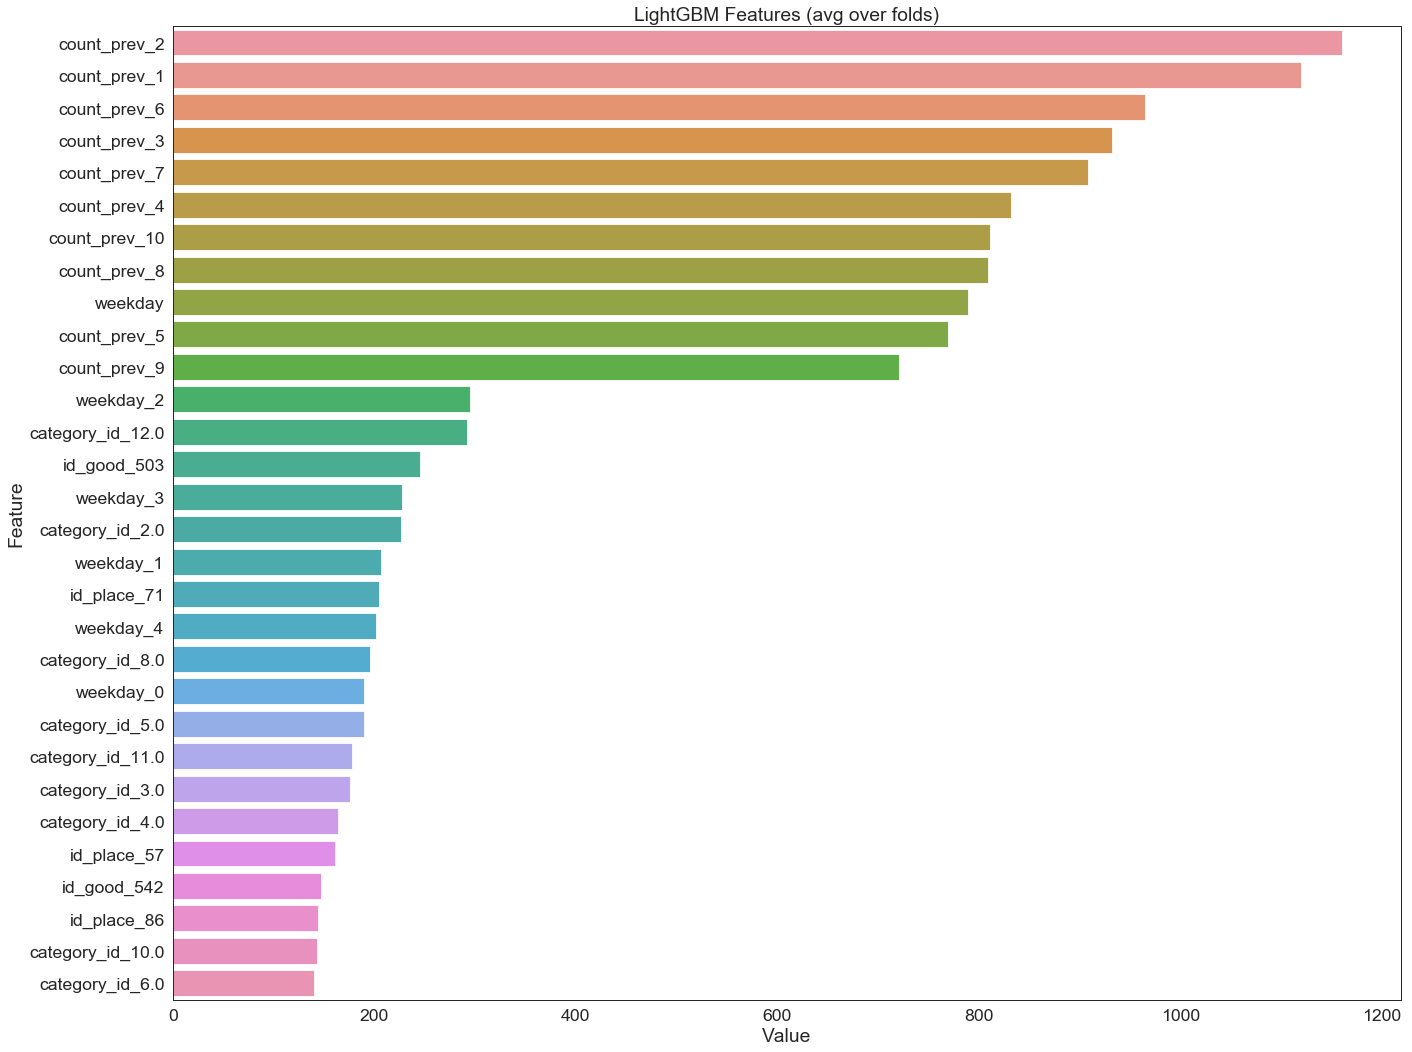

In [574]:
first = 30

sns.set_context("paper", font_scale=2)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),model.feature_name())), columns=['Value','Feature'])


#feature_imp = feature_imp[~(feature_imp.Feature.isin(['dev_max_turnover']))][:]

#feature_imp = feature_imp[int_columns][:]

feature_imp = feature_imp.tail(first)[:]

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [575]:
cnt_predict = model.predict(X_test[interest_columns][:])

In [576]:
from sklearn.metrics import mean_squared_error as mse

In [577]:
mse(y_test, cnt_predict)

0.1472603630670123

1) Решается задача поиска зависимости спроса на товар в текущий день от
    - количества покупки товара в предыдущие дни 
    - текущего дня недели
2) Использовалась модель:
    - для регрессии (предсказывания величины)
    - с алгоритмом gbdt( Gradient Boosting Decision Tree)
    - глубиной деревьев 14
    - количеством листьев 48
    - метрикой критерия / методом минимизации ошибки служил МНК (Метод наименьших квадратов)
   Изменено:
    - количество листьев до 225
    - глубину до 30
3) Таргет - количество купленного в текущий день товара
4) Минимизируется сумма наименьших квадратов ошибок
5) Итоговый критерий - сумма наименьших квадратов ошибок